# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des ""überwachten Lernens"" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die _Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen_ an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?

2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?


Ein Naive Bayes-Klassifikator ist ein probabilistisches maschinelles Lernmodell, das für Klassifikationsaufgaben verwendet wird. Der Kern des Klassifikators basiert auf dem Bayes-Theorem. 

3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?


4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion _getwords(doc)_, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen _split(), strip('sep')_ und _lower()_ der Klasse _String_.  


In [51]:
DOC_PATH = r"C:\Users\Janina\Documents\DEV\ML-JupyterNotebook-DEV\datamining_and_patternrec\src\proj4_document_classification\data\train"
test_string = "This error occurs because you are using a normal; string as a path. You can use one of the following solutions to fix your problem."

In [52]:
def getwords(doc):
    word_dict = {x.strip(';:,.!?') : 1 for x in doc.lower().split() if (len(x.strip(';:,.!?')) in range(3,20))}
    return word_dict

In [53]:
result = getwords(test_string)
result

{'this': 1,
 'error': 1,
 'occurs': 1,
 'because': 1,
 'you': 1,
 'are': 1,
 'using': 1,
 'normal': 1,
 'string': 1,
 'path': 1,
 'can': 1,
 'use': 1,
 'one': 1,
 'the': 1,
 'following': 1,
 'solutions': 1,
 'fix': 1,
 'your': 1,
 'problem': 1}

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion _getwords()_ übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die _getwords()_-Funktion ausserhalb der Klasse definiert und beim Anlegen eines _Classifier_-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der _fc_-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der _cc_-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (_item_) und der entsprechenden Kategorisierung (_cat_) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert _getwords()_) in Worte zerlegt. Für jedes einzelne Wort wird dann _incf(self,f,cat)_ aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt. Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [54]:
from collections import defaultdict

In [55]:
class Classifier:

    """
    - ein dictionary mit instanzvariable fc und cc initialisiert
    - fc ist ein verschachteltes dictionary
    - values zählen, wie häufig das Wort auftrat
    """
    def __init__(self, getfeatures, categories):
        self.fc = defaultdict(lambda: defaultdict(int))
        self.cc = defaultdict(int)
        self.getfeatures = getfeatures
        self.categorie = categories 
    
    """
    - wird ein Wort f übergeben
    - wird eine zugehörige Kategorie cat übergeben
    - der fc Zähler wird angepasst
    """
    def incf(self, f, cat):
        if(f in self.fc):
            self.fc[f][cat] = self.fc[f][cat]+1
        else:
            tempDict = {}
            for x in self.categorie:
                tempDict[x] = 0
            self.fc[f] = tempDict
            self.fc[f][cat]=self.fc[f][cat]+1
    
    """
    - die Kategorie cat übergeben
    - cc Zähler wird angepasst
    """
    def incc(self, cat):
        self.cc[cat] = self.cc[cat]+1
    
    """
    - gibt Häufigkeit des wortes f zurück
    """
    def fcount(self, f, cat):
        if(f in self.fc):
            return self.fc[f][cat]
        else:
            return 0
    """
    - gibt die Anzahl der Dokumente der Kategorie cat zurück
    """
    def catcount(self, cat):
        return self.cc[cat]
    
    """
    - gibt Anzahl aller Dokumente zurück
    """
    def totalcount(self):
        return sum(self.cc.values())

    """
    - wird ein neues Trainingselement mit
    Betreffzeile (item) und Kategorisierung (cat) übergeben
    - Aufruf von incf(f, cat) je feature
    """
    def train(self, item, cat):
        features = self.getfeatures(item)
        for f in features:
            self.incf(f, cat)
        self.incc(cat)    

    """
    - je geringer die Anzahl an Worten, desto extremer das ergebnis
    - als ausgleich wird weightedprob implementiert
    """
    def fprob(self, f ,cat):
        return self.fcount(f, cat)/self.catcount(cat)

    """
    - berechnet einen wahrscheinlichkeitswert
    - initProb ist ein initialier Wahrscheinlichkeitswert
    - je häufiger das wort vorkommt, desto mehr nimmt 
    """
    def weightedprob(self,f,cat):
        initProb = 0.5
        if(f in self.fc):
            count = sum(self.fc[f].values())
        else:
            count = 0
        return (initProb + count * self.fprob(f,cat))/(1+count)

    """
    - Übergabe beliebigen Textdokumentes
    - Berechnung der bedingten Wahrscheinlichkeit mit
      a-postpriori-Wahrscheinlichkeit P(C/X) 
    """
    def prob(self, item, cat):
        features = self.getfeatures(item)
        produkt = 1
        for f in features:
            produkt = produkt * self.weightedprob(f, cat)
        return produkt * (self.catcount(cat)/self.totalcount())    
    
    """
    - Kategorisierung des dokuemnts
    """
    def categorise(self, item, catA, catB):
        a = self.prob(item, catA)
        b = self.prob(item, catB)
        if a>b:
            return catA
        else:
            return catB    

## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in 
[NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [56]:
testDict = {"nobody owns the water": "good", 
            "the quick rabbit jumps fences":"good",
           "buy pharmaceuticals now":"bad",
           "make quick money at the online casino":"bad",
           "the quick brown fox jumps":"good",
           "next meeting is at night":"good",
           "meeting with your superstar":"bad",
           "money like water":"bad"}

In [57]:
classifier_model = Classifier(getwords, ['good', 'bad'])

for key, value in testDict.items():
    classifier_model.train(key, value)

print("...Gehört zu Klasse: ", classifier_model.categorise("nobody owns the water", "good", "bad"))

...Gehört zu Klasse:  good


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

In [58]:
!pip install feedparser
import feedparser

In [59]:
import feedparser

def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.


In [60]:
countnews={}
countnews['tech']=0
countnews['nontech']=0
countnews['test']=0

# Training data
TextDict = {}
# Test data
testList = []
testVerificationDict = {}

Training des Naive Bayes Classifier mit allen Nachrichten in der Liste _trainTech_.

In [61]:
trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

print ("--------------------News from trainTech------------------------")
for feed in trainTech:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+e.description)
        print (fulltext)
        countnews['tech']+=1
        
        TextDict.update( {fulltext: "Tech"} )

--------------------News from trainTech------------------------
******************************
http://rss.chip.de/c/573/f/7439/index.rss
******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml

---------------------------
Dieser Browser-Test zeigt, ob Ihr Router sicher ist Ungesicherte Router können über das Internet zum Einfallstor für Angreifer werden. Ist Ihr Router ausreichend geschützt? Ein kostenloser Browser-Test schafft Klarheit. 
Offen wie ein Scheunentor oder verschwiegen wie ein Grab? Wer wissen möchte, ob sein Router und das darauf laufende Firewall-Programm das Heimnetzwerk gut gegen mögliche Angreifer abschirmen, sollte einen Netzwerkcheck starten –...

---------------------------
Tabelleninhalt in Excel in separate Spalten aufteilen Wer Excel nutzt und bestimmte Daten einer Tabelle aufteilen will, braucht nur wenige Handgriffe. Wir zeigen, was Sie tun müssen. 
Tabelleninhalte wie zum Beispiel Name, Vorname und Adresse lassen sich in Microsofts P

Training des Naive Bayes Classifier mit allen Nachrichten in der Liste _nonTech_.

In [62]:
trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/'
              ]

print ("--------------------News from trainNonTech------------------------")
for feed in trainNonTech:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+ e.description)
        print (fulltext)
        countnews['nontech']+=1
        
        TextDict.update( {fulltext: "NonTech"} )

--------------------News from trainNonTech------------------------
******************************
http://newsfeed.zeit.de/index

---------------------------
Bundesamt für Verfassungsschutz: Zahl linksextremistischer Straftaten deutlich gestiegen     Laut einem Medienbericht registrierte der Verfassungsschutz 2019 deutlich mehr Straftaten als 2018. Mehr als jeder vierte Linksextremist sei demnach gewaltorientiert.

---------------------------
Stuttgart: Winfried Kretschmann verurteilt Randale als Landfriedensbruch     "Das gehört zu den schweren Straftaten", sagt Ministerpräsident Kretschmann zu den Randalen in Stuttgart. Bundesinnenminister Horst Seehofer fordert strengere Strafen.

---------------------------
Corona-Medikament: Gestatten, Dexamethason – jetzt auch Corona-Arznei     Ein Medikament, das Ärztinnen gegen Rheuma, Asthma und die Appetitlosigkeit Sterbender einsetzen, soll nun auch schwerkranke Covid-19-Patienten retten. Wie wirkt es?

---------------------------
Horst Seeho

In [63]:
test=["http://rss.golem.de/rss.php?r=sw&feed=RSS0.91",
          'http://newsfeed.zeit.de/politik/index',  
          'http://www.welt.de/?service=Rss'
           ]

print ("--------------------News from test------------------------")
for feed in test:
    print ("*"*30)
    print (feed)
    f=feedparser.parse(feed)
    for e in f.entries:
        print ('\n---------------------------')
        fulltext=stripHTML(e.title+' '+e.description)
        print (fulltext)
        countnews['test']+=1
        
        testList.append(fulltext)
        
        if feed == test[0]:
            testVerificationDict.update( {fulltext: "Tech"} )
        else:
            testVerificationDict.update( {fulltext: "NonTech"} )

--------------------News from test------------------------
******************************
http://rss.golem.de/rss.php?r=sw&feed=RSS0.91

---------------------------
End of Life: Flash Player soll sich selbst zerstören Die Software soll einen Selbstzerstörungsmechanismus erhalten und im Jahr 2021 nicht mehr funktionieren. ( Flash ,  Browser )  

---------------------------
Nintendo Nes: Nindendos 8-Bit-Spiele in 3D Der Emulator 3dSen haucht NES-Spielen in der dritten Dimension neues Leben ein. Das Programm ist ab sofort auf Steam erhältlich. ( Nintendo ,  Steam )  

---------------------------
Unix: Ein Betriebssystem in 8 Kbyte Zwei junge Programmierer entwarfen nahezu im Alleingang ein Betriebssystem und die Sprache C. Zum 50. Jubiläum von Unix werfen wir einen Blick zurück auf die Anfangstage. ( Unix ,  POSIX )  

---------------------------
KI: Software generiert 3D-Modelle aus 2D-Bildern Das Forscherteam arbeitetet seit einigen Jahren an Pifu und Pifu HD. Die KI kann sowohl Fotos a

In [64]:
print ('Number of used trainings samples in categorie tech', countnews['tech'])
print ('Number of used trainings samples in categorie notech', countnews['nontech'])
print ('Number of used test samples', countnews['test'])

Number of used trainings samples in categorie tech 105
Number of used trainings samples in categorie notech 96
Number of used test samples 85


2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf) definiert.

In [65]:
classifier_model = Classifier(getwords, ['Tech', 'NonTech'])

for k, v in TextDict.items(): 
    classifier_model.train(k,v)

In [66]:
classificationDict = {}

for text in testList:
    
    categorise = classifier_model.categorise(text, "Tech", "NonTech")
    
    print(text,"\nBelongs to the class: ",categorise)
    print ('---------------------------\n')
    
    classificationDict.update( {text: categorise} )

End of Life: Flash Player soll sich selbst zerstören Die Software soll einen Selbstzerstörungsmechanismus erhalten und im Jahr 2021 nicht mehr funktionieren. ( Flash ,  Browser )   
Belongs to the class:  Tech
---------------------------

Nintendo Nes: Nindendos 8-Bit-Spiele in 3D Der Emulator 3dSen haucht NES-Spielen in der dritten Dimension neues Leben ein. Das Programm ist ab sofort auf Steam erhältlich. ( Nintendo ,  Steam )   
Belongs to the class:  NonTech
---------------------------

Unix: Ein Betriebssystem in 8 Kbyte Zwei junge Programmierer entwarfen nahezu im Alleingang ein Betriebssystem und die Sprache C. Zum 50. Jubiläum von Unix werfen wir einen Blick zurück auf die Anfangstage. ( Unix ,  POSIX )   
Belongs to the class:  Tech
---------------------------

KI: Software generiert 3D-Modelle aus 2D-Bildern Das Forscherteam arbeitetet seit einigen Jahren an Pifu und Pifu HD. Die KI kann sowohl Fotos als auch Videos in 3D-Figuren umwandeln. ( Neuronales Netzwerk ,  KI )   
Be

In [67]:
display("Actual Classification: ", classificationDict.values())
print ('\n---------------------------\n')
display("Test Classification: ", testVerificationDict.values())

'Actual Classification: '

dict_values(['Tech', 'NonTech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'NonTech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'Tech', 'NonTech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech'])


---------------------------



'Test Classification: '

dict_values(['Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech', 'NonTech'])

#### Konfusionsmatrix und die Accuracy sowie für beide Klassen Precision, Recall und F1-Score. 

In [68]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Berechnung einer Confusion Matrix für eine binäre Klassifikation

In [69]:
y_true = np.array(list(classificationDict.values()))
y_pred = np.array(list(testVerificationDict.values()))

1. Sklearn Confusion Matrix

In [70]:
cm = confusion_matrix(y_true, y_pred, labels=["NonTech", "Tech"])
display(cm)

array([[39,  6],
       [ 6, 34]], dtype=int64)

2. Pandas Crosstab

In [71]:
exp_series = pd.Series(y_true)
pred_series = pd.Series(y_pred)

pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,NonTech,Tech,All
Actual,,,
NonTech,39,6,45
Tech,6,34,40
All,45,40,85


3. Grafische Exploration mittels Matplot _imshow()_

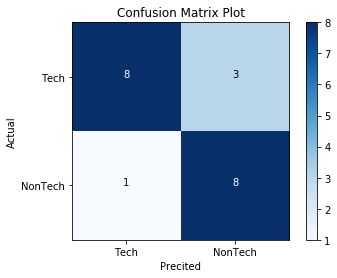

In [101]:
import itertools

def conmatrix(cm, y_true, class_labels):
    plt.imshow(cm, cmap=plt.cm.Blues,interpolation='nearest')
    plt.title('Confusion Matrix Plot')
    plt.colorbar()
    plt.xlabel('Precited')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(y_true))) # length of classes
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    # plotting text value inside cells
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'), horizontalalignment='center',color='white' if cm[i,j] >thresh else 'black')
    plt.show();

class_labels = ['Tech','NonTech']
conmatrix(cm, y_true, class_labels)

Kalkulation von TP, FP, TN und FN 

In [102]:
# positive class = "Tech", negative class = "nonTech"
tn, fp, fn, tp = cm.ravel()

In [103]:
print('True Positive: {} '.format(tp))
print('False Positive: {} '.format(fp))
print('True Negative: {} '.format(tn))
print('False Negative: {} '.format(fn))

True Positive: 8 
False Positive: 3 
True Negative: 8 
False Negative: 1 


Kalkulation von Precision, Recall, Accuracy und F1-Score

In [104]:
def precision(tp, fp):
    return tp/(tp+fp)
    
def recall(tp, fn):
    return tp/(tp+fn)

def accuracy(tp, tn, total):
    return (tp + tn)/total

def f1_score(precision, recall):
    return 2*((precision * recall)/(precision+recall))    

In [105]:
print('Precision: {0}'.format(precision(tp, fp)))
print('Recall: {0}'.format(recall(tp, fn)))
print('Accuracy: {0}'.format(accuracy(tp, tn, len(classificationDict))))
print('F1-Score: {0}'.format(f1_score(precision(tp, fp), recall(tp, fn))))

Precision: 0.7272727272727273
Recall: 0.8888888888888888
Accuracy: 0.18823529411764706
F1-Score: 0.7999999999999999


3. Diskutieren Sie das Ergebnis

Die _Confusion Matrix_ ist eine Methode zur Leistungsmessung für Klassifizierungsproblematiken des maschinellen Lernens. Die Ausgabe (engl., _Output_) kann zwischen einer und mehrerer Klassen liegen. 
Visuell dargestellt ist die _Confusion Matrix_ eine Tabelle mit 4 verschiedenen Kombinationen (_TP, FP, FN, TN_) zwischen vorhergesagten und tatsächlichen Werten.

##### Recall
Die Maßzahl des Recall (dt., _Sensitivität_) oder Richtig-Positiv-Rate des Klassifikators erlaubt Aussagen darüber, wie viele Werte korrekt vorhergesagt wurden.

##### Precision
Die Maßzahl der Precision (dt., _Genauigkeit_) ermöglicht eine Aussage darüber, wie viele positiv vorhergesagten Werte tatsächlich der positiven Klasse zugeordnet werden können.

##### Accuracy
Die Maßzahl der Accuracy erlaubt eine Aussage über den Anteil der korrekt klassifizierten Fälle. Bei unausgeglichenen (engl., _biased_) Testdaten wird mit der _Accuracy_ die Effektivität eines Klassifikators nicht mehr erfassbar.  

##### F1-Score
Die Maßzahl des F1-Score ist das harmonische Mittel aus Precision und Recall und wird häufig als zusammenfassende Metrik verwendet. Der F1-Score oder F-Maß ist daher ein guter Indikator für die Genauigkeit der erzielten Ergebnisse von Recall und Precision. 

#### Analyse des Ergebnisses
Anhand der _Confusion Matrix_ ist ersichtlich dass die Maßzahlen von Recall (~ 79.55 %), Precision (~ 87.5 %), als auch Accuracy (~ 83.53 %) einen sehr guten Wert nahe des best zu erzielenden Scores von 100% erzielen. 

4. Wie könnte die Klassifikationsgüte durch Modifikation der _getwords()_-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

//TODO

## Zusatzsaufgabe: Naive Bayes Document Classification
Ziel dieser Exploration ist die Untersuchung der Qualifikation von Dokument Klassifikation mittels online frei verfügbaren, bereits gelabelten Philosophie Dokumenten, unter der Zuhilfenahme eines _Naive Bayes Classifier_ Algorithmus. Der _Naive Bayesche_ Algorithmus wird als "naiv" bezeichnet, da dieser die Wahrscheinlichkeit, dass ein Wort in einem bestimmten Dokument vorkommt so behandelt, als wäre diese völlig unabhängig von der Wahrscheinlichkeit, dass ein anderes Wort ebenfalls vorkommt. Dokumente enthalten gewisse Regeln der Grammatik, sowie eine Syntax. Im Folgenden wird eine, etwas komplexere Klassifizierungsaufgabe betrachtet, bei der es darum geht den Abstract von _philosophischen_ Artikeln zu klassifizieren. Dabei werden Teildisziplinen gewählt, die sich zwar voneinander unterschieden, jedoch inhaltlich stark überschneiden. Dies betrifft die Erkenntnistheorie und Ethik.

Beispielweise könnte man überprüfen wollen, ob die Worte "preheat the oven" eher zur Kategorie "cookbook" oder "novels" gehört. In diesem Fall würde man die folgende Wahrscheinlichkeit,
``` Pr(cookbook) * Pr(“preheat”|cookbook) * Pr(“the”|cookbook) * Pr(“oven”|cookbook) ```

mit 

``` Pr(novel) * Pr(“preheat”|novel) * Pr(“the”|novel) * Pr(“oven”|novel) ``` 

vergleichen, um herauszufinden, welche Wahrscheinlichkeit den größeren Wert und damit einen Rückschluss auf die Kategorie "cookbook" oder "novels" gibt.


1. Vorbereitung der Trainings- und Testdaten

Die Datenbank welche für die gelabelten Daten verwendet wird heißt _PhilPapers_ und ist unter folgendem Link PhilPapers (https://philpapers.org/) zu finden.
- _Ethics Abstract_ , gefunden unter: https://philpapers.org/browse/varieties-of-virtue-ethics zum Thema "varieties of virtue ethics".
- _Epistemology Abstract_ , gefunden unter: https://philpapers.org/browse/trust zum Thema "trust".

Die Datensätze bestehen aus jeweils 40 Datensätzen je Klasse.

In [106]:
import pandas as pd

df_documents = pd.read_csv('../data/csv/trainingdata_z1.csv', sep=";", error_bad_lines=False)

In [107]:
df_documents.head(5)

,abstract,category
0,We examine the following consequentialist view...,Ethics
1,The paper argues that care ethics should be su...,Ethics
2,"In recent years, scholars of Confucian ethics ...",Ethics
3,"Virtue Ethics_ collects, for the first time, t...",Ethics
4,This dissertation integrates the work of femin...,Ethics


In [108]:
df_documents.tail(5)

,abstract,category
74,This volume has its roots in two recent develo...,Epistemology
75,What kind of mental state is trust? It seems t...,Epistemology
76,This essay conceives ecological life as radica...,Epistemology
77,The lack of public support for climate change ...,Epistemology
78,In this paper we address the question of how i...,Epistemology


Umwandlung von kategorischen (_Ethics, Epistemology_) in numerische Label (_0, 1_). 

In [109]:
df_documents['label'] = df_documents['category'].apply(lambda x: 0 if x=='Epistemology' else 1)

In [110]:
df_documents.head(5)

,abstract,category,label
0,We examine the following consequentialist view...,Ethics,1
1,The paper argues that care ethics should be su...,Ethics,1
2,"In recent years, scholars of Confucian ethics ...",Ethics,1
3,"Virtue Ethics_ collects, for the first time, t...",Ethics,1
4,This dissertation integrates the work of femin...,Ethics,1


In [111]:
df_documents.tail(5)

,abstract,category,label
74,This volume has its roots in two recent develo...,Epistemology,0
75,What kind of mental state is trust? It seems t...,Epistemology,0
76,This essay conceives ecological life as radica...,Epistemology,0
77,The lack of public support for climate change ...,Epistemology,0
78,In this paper we address the question of how i...,Epistemology,0


Auftrennen der Daten in _Training_ und _Test_ Daten
* Daten werden für spätere Testzwecke und Validierung zurück gehalten

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_documents['abstract'], df_documents['label'], random_state=1)

3. Konvertierung von _abstract_ Werten in Vektoren mit Anzahl der Wörter
* Wie häufig tritt ein Wort in einem Dokument auf?
* Wie häufig tritt ein Wort in der jeweiligen Kategorie auf?

Hierfür werden die Strings der Spalte _abstract_ jeweils in Vektoren umgewandelt. Dabei repräsentiert jede Reihe ein Dokument und jede Spalte repräsentiert ein Wort. Sprachelemente wie Zahlen, Artikel, Punktuation oder allgemein als "nonwords" deklarierbare Elemente müssen exkludiert werden, da diese keinen Mehrwert für die Klassifikationsaufgabe liefern. 


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# transform vector of words to matrix
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

Untersuchung der konvertierten Trainings- und Testdaten. 

In [114]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

Exploration der am häufigsten entdeckten Begriffe/Worte:

In [115]:
top_words_df.head(10)

,0
virtue,172
ethics,143
trust,96
care,60
account,38
moral,35
agent,34
action,33
theory,32
s,29


Text(0, 0.5, 'Amount of words in documents')

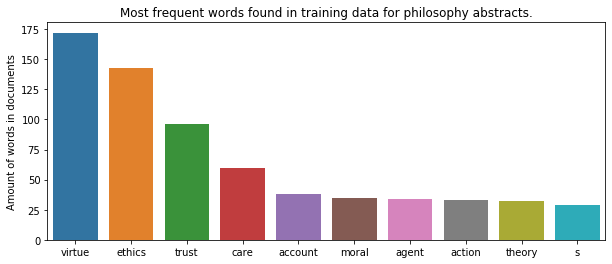

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

firstten_df = top_words_df[:10]
# Set the width and height of the figure
plt.figure(figsize=(10,4))
plt.title("Most frequent words found in training data for philosophy abstracts.")
sns.barplot(x=firstten_df.index, y=firstten_df.get(0))
plt.ylabel("Amount of words in documents")

4. Training des _Multinomial Naive Bayes Classifier_ Algorithmus

In [117]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
# training
naive_bayes_model.fit(X_train_cv, y_train)
# prediction of output label
predictions = naive_bayes_model.predict(X_test_cv)

5. Bewertung des trainierten Models mittels Accuracy, Precision und Recall

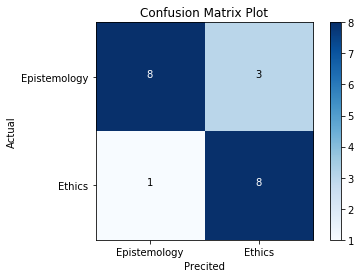

In [119]:
cm = confusion_matrix(y_test, predictions)
labels=['Epistemology', 'Ethics']

conmatrix(cm, y_test, labels)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.8
Precision score: 0.7272727272727273
Recall score: 0.8888888888888888
F1 score: 0.7999999999999999


#### Diskussion des Ergebnisses
Insgesamt konnte das trainierte Model einen guten Wert bei Accuracy (~ 80%), Precision (~ 72.3%) als auch Recall (~ 88.9%) erzielen. Hier konnten durch die Erhöhung von gelabelten Trainingsdaten von 20 Textdokumenten je Klasse auf 40 je Klasse deutliche Verbesserungen in der Generalisierung erzielt werden.

6. Untersuchung der klassifzierten Label

In [120]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('Ethics')
    else:
        testing_predictions.append('Epistemology')
check_df = pd.DataFrame({'actual label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
check_df.replace(to_replace=0, value='Epistemology', inplace=True)
check_df.replace(to_replace=1, value='Ethics', inplace=True)

display(check_df)

,actual label,prediction,abstract
0,Epistemology,Epistemology,"“Whatever matters to human beings, trust is th..."
1,Ethics,Ethics,"In Morals From Motives, Michael Slote defends ..."
2,Ethics,Ethics,How do we care well for a human being: ourselv...
3,Epistemology,Ethics,"In this paper, I defend the view that it is wr..."
4,Epistemology,Epistemology,Trust is so intimately linked with faith that ...
5,Epistemology,Epistemology,Most theories of trust presume that trust is a...
6,Epistemology,Epistemology,What makes science trustworthy to the public? ...
7,Epistemology,Epistemology,This volume has its roots in two recent develo...
8,Epistemology,Epistemology,"In this chapter, we consider ethical and philo..."
9,Epistemology,Ethics,"In Book III, Part 2 of the Treatise, Hume pres..."
